In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
connection = psycopg2.connect(database="regressiondata", host="lapisco2.fortaleza.ifce.edu.br", port=3432, user="conceptu", password="conceptu@ifce")

In [3]:
cursor = connection.cursor()

In [4]:
cursor.execute("""SELECT DISTINCT vento  FROM regression;""")
fetch = cursor.fetchall()
list_regression_vento = [i[0] for i in cursor.description]

regression_table_vento = pd.DataFrame(fetch, columns= list_regression_vento)
display(regression_table_vento)

,vento
0,11.0
1,10.9
2,13.4
3,8.7
4,13.3
...,...
98,7.3
99,14.1
100,11.4
101,9.4


In [5]:
cursor.execute("""SELECT DISTINCT  pot  FROM regression;""")
fetch = cursor.fetchall()
list_regression_pot = [i[0] for i in cursor.description]

regression_table_pot = pd.DataFrame(fetch, columns= list_regression_pot)
display(regression_table_pot)

,pot
0,519.0
1,0.0
2,472.0
3,154.0
4,346.0
...,...
413,504.0
414,374.0
415,290.0
416,180.0


In [6]:
list_vent = []
for iterable_vent in regression_table_vento["vento"]:
    list_vent.append(iterable_vent)
print(list_vent)

[11.0, 10.9, 13.4, 8.7, 13.3, 10.4, 9.0, 9.1, 14.3, 8.3, 5.9, 12.8, 9.3, 4.4, 8.4, 3.0, 2.9, 11.1, 9.9, 4.3, 9.5, 13.1, 8.2, 7.0, 3.7, 7.6, 13.6, 12.5, 5.3, 3.9, 6.4, 10.3, 5.2, 6.7, 9.6, 7.1, 12.3, 11.9, 8.0, 11.3, 6.6, 3.8, 10.7, 10.5, 7.2, 3.5, 13.7, 8.1, 4.0, 9.2, 11.7, 9.8, 7.4, 5.8, 11.8, 8.6, 4.6, 6.8, 12.2, 12.0, 4.1, 10.2, 3.6, 7.8, 4.5, 6.2, 12.4, 13.9, 4.9, 5.0, 4.2, 14.0, 13.0, 11.5, 8.9, 14.4, 11.6, 10.1, 12.7, 10.6, 6.9, 7.5, 12.6, 7.7, 9.7, 6.1, 10.0, 13.5, 11.2, 10.8, 8.8, 7.9, 3.2, 12.1, 13.2, 6.3, 12.9, 8.5, 7.3, 14.1, 11.4, 9.4, 6.5]


In [7]:
list_pot = []
for iterable_pot in regression_table_pot["pot"]:
    list_pot.append(iterable_pot)
print(list_pot)
list_pot = list_pot[:103]

[519.0, 0.0, 472.0, 154.0, 346.0, 174.0, 517.0, 322.0, 248.0, 215.0, 515.0, 362.0, 367.0, 342.0, 235.0, 412.0, 156.0, 436.0, 409.0, 153.0, 284.0, 135.0, 318.0, 428.0, 276.0, 454.0, 227.0, 33.0, 399.0, 224.0, 376.0, 269.0, 448.0, 205.0, 56.0, 317.0, 467.0, 372.0, 236.0, 146.0, 459.0, 464.0, 506.0, 440.0, 335.0, 345.0, 429.0, 150.0, 46.0, 359.0, 495.0, 145.0, 460.0, 190.0, 301.0, 432.0, 282.0, 119.0, 481.0, 223.0, 163.0, 431.0, 77.0, 268.0, 469.0, 425.0, 31.0, 424.0, 101.0, 449.0, 152.0, 137.0, 413.0, 350.0, 211.0, 23.0, 252.0, 151.0, 441.0, 308.0, 289.0, 231.0, 228.0, 513.0, 518.0, 312.0, 439.0, 320.0, 238.0, 261.0, 267.0, 207.0, 437.0, 446.0, 273.0, 351.0, 149.0, 502.0, 478.0, 319.0, 232.0, 202.0, 421.0, 38.0, 158.0, 90.0, 396.0, 300.0, 170.0, 221.0, 112.0, 242.0, 520.0, 398.0, 357.0, 450.0, 355.0, 456.0, 382.0, 378.0, 294.0, 256.0, 210.0, 30.0, 266.0, 194.0, 503.0, 497.0, 52.0, 389.0, 419.0, 475.0, 401.0, 239.0, 200.0, 198.0, 245.0, 278.0, 270.0, 188.0, 430.0, 470.0, 66.0, 213.0, 161.

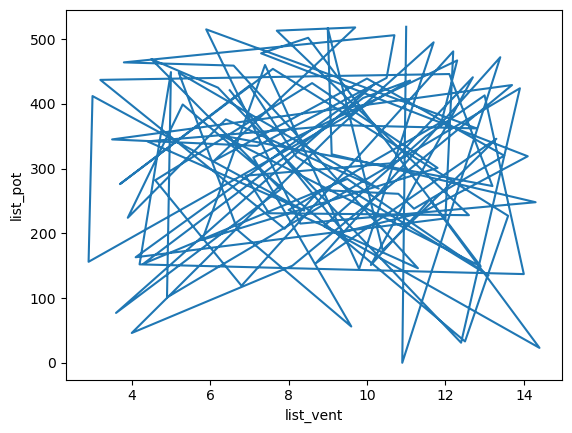

In [8]:
plt.plot(list_vent, list_pot)
plt.xlabel('list_vent')
plt.ylabel('list_pot')
plt.show()

In [9]:
slope, intercept, r, p, std_err = stats.linregress(list_vent, list_pot)

In [10]:
def myfunc(list_vent):
 return slope * list_vent + intercept

In [11]:
mymodel = list(map(myfunc, list_vent))

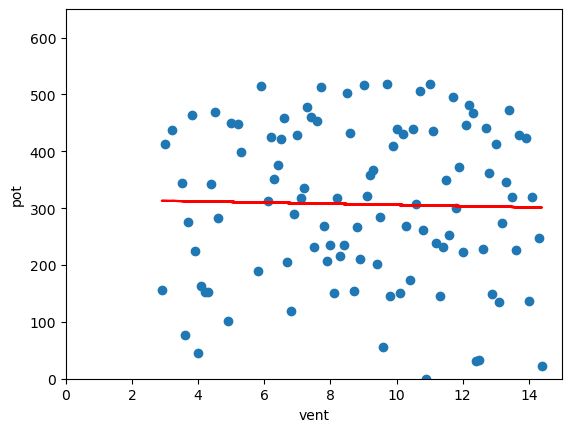

In [13]:
plt.scatter(list_vent, list_pot)
plt.plot(list_vent, mymodel, color= 'r')
plt.ylim(ymin=0, ymax=650)
plt.xlim(xmin=0, xmax=15)
plt.xlabel("vent")
plt.ylabel ("pot")
plt.show()